<a href="https://colab.research.google.com/github/OmarFarukNoman/Into-to-Machine-Learning/blob/main/Homework-4/Problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SVM with different Kernels vs Logistic Regression

SVM - LINEAR KERNEL:
Train Accuracy: 1.0000
Test Accuracy:  0.9561
Precision:      0.9697
Recall:         0.9552
F1 Score:       0.9624

SVM - POLY KERNEL:
Train Accuracy: 1.0000
Test Accuracy:  0.9474
Precision:      0.9552
Recall:         0.9552
F1 Score:       0.9552

SVM - RBF KERNEL:
Train Accuracy: 1.0000
Test Accuracy:  0.9474
Precision:      0.9841
Recall:         0.9254
F1 Score:       0.9538

SVM - SIGMOID KERNEL:
Train Accuracy: 0.9165
Test Accuracy:  0.8860
Precision:      0.9219
Recall:         0.8806
F1 Score:       0.9008

Logistic Regression:
Train Accuracy: 0.9758
Test Accuracy:  0.9737
Precision:      0.9706
Recall:         0.9851
F1 Score:       0.9778

Model                Test Accuracy Precision  Recall   F1 Score  
---------------------------------------------------------------
Logistic Regression  0.9737       0.9706     0.9851   0.9778    
SVM-LINEAR           0.9561       0.9697     0.9552   0.9624    
SVM-POLY

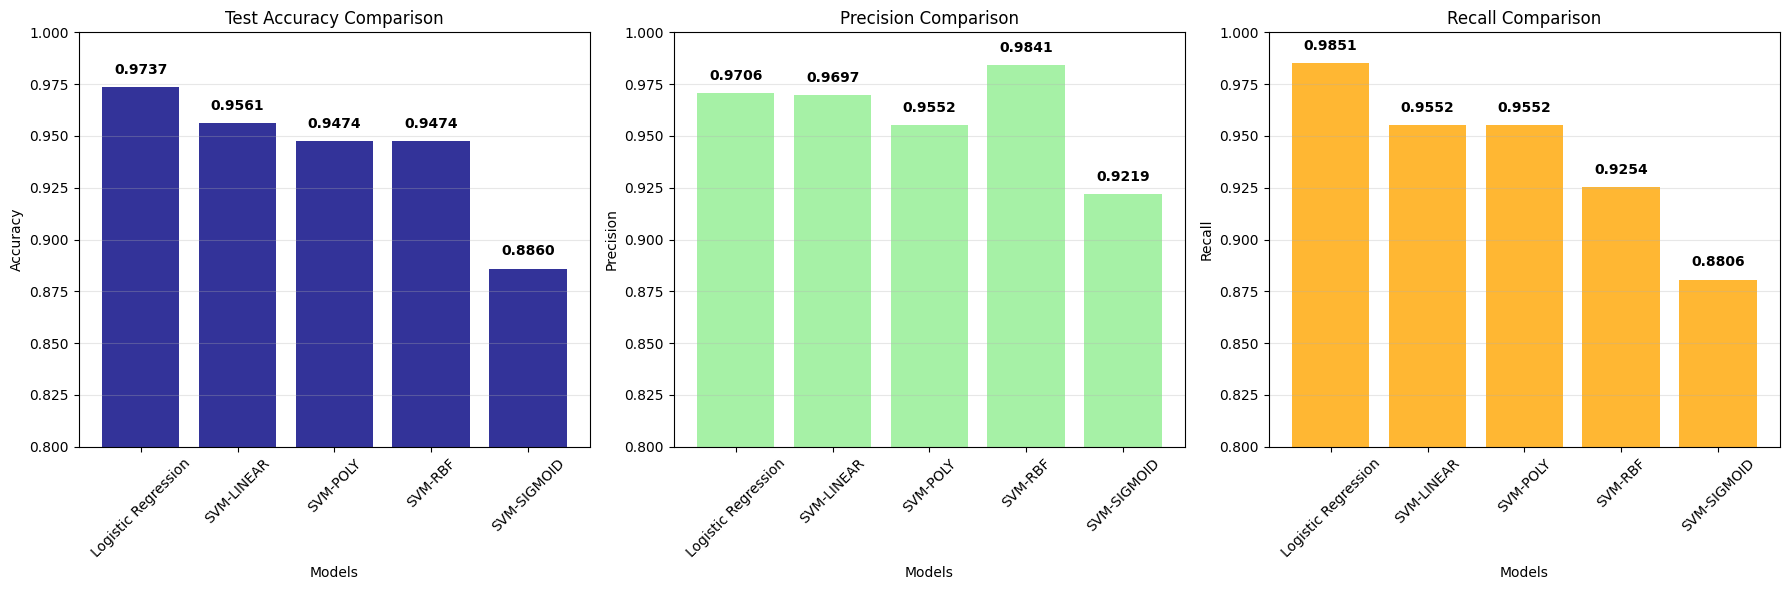

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# We're using the cancer dataset
cancer = load_breast_cancer(as_frame=True)
df_cancer = cancer.frame

# I've separated input features and target
X_in = df_cancer.drop('target', axis=1)
y_out = df_cancer['target']

# I've splited the data
X_train, X_test, y_train, y_test = train_test_split(X_in, y_out, test_size=0.2, random_state=0)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# I've used different kernels to check the model performance.
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svm_metrics = {}

for kernel in kernels:
    if kernel == 'poly':
        svm = SVC(kernel=kernel, C=1E10, degree=3, random_state=0)
    else:
        svm = SVC(kernel=kernel, C=1E10, random_state=0)

    svm.fit(X_train_scaled, y_train)

    # Predictions
    y_pred_train_svm = svm.predict(X_train_scaled)
    y_pred_test_svm = svm.predict(X_test_scaled)

    # Evaluation metrics (SVM)
    svm_metrics[kernel] = {
        'train_accuracy': accuracy_score(y_train, y_pred_train_svm),
        'test_accuracy': accuracy_score(y_test, y_pred_test_svm),
        'precision': precision_score(y_test, y_pred_test_svm),
        'recall': recall_score(y_test, y_pred_test_svm),
        'f1': f1_score(y_test, y_pred_test_svm)
    }

# Our task is to compare the performance of SVM with different kernels with logistic regression (HW-3). So I've added the logistic regression model with same properties as HW3 to make a comparison.
regularization_strength = 10
logreg = LogisticRegression(random_state=0, max_iter=1200, penalty='l1', C=1/regularization_strength, solver='liblinear')
logreg.fit(X_train_scaled, y_train)

# Predictions
y_pred_train_lr = logreg.predict(X_train_scaled)
y_pred_test_lr = logreg.predict(X_test_scaled)

# Evaluation metrics (Logistic Regression)
lr_metrics = {
    'train_accuracy': accuracy_score(y_train, y_pred_train_lr),
    'test_accuracy': accuracy_score(y_test, y_pred_test_lr),
    'precision': precision_score(y_test, y_pred_test_lr),
    'recall': recall_score(y_test, y_pred_test_lr),
    'f1': f1_score(y_test, y_pred_test_lr)
}

#Comparison Results
print("SVM with different Kernels vs Logistic Regression")
#SVM
for kernel in kernels:
    print(f"\nSVM - {kernel.upper()} KERNEL:")
    print(f"Train Accuracy: {svm_metrics[kernel]['train_accuracy']:.4f}")
    print(f"Test Accuracy:  {svm_metrics[kernel]['test_accuracy']:.4f}")
    print(f"Precision:      {svm_metrics[kernel]['precision']:.4f}")
    print(f"Recall:         {svm_metrics[kernel]['recall']:.4f}")
    print(f"F1 Score:       {svm_metrics[kernel]['f1']:.4f}")
#Logistic Regression
print("\nLogistic Regression:")
print(f"Train Accuracy: {lr_metrics['train_accuracy']:.4f}")
print(f"Test Accuracy:  {lr_metrics['test_accuracy']:.4f}")
print(f"Precision:      {lr_metrics['precision']:.4f}")
print(f"Recall:         {lr_metrics['recall']:.4f}")
print(f"F1 Score:       {lr_metrics['f1']:.4f}")

# Simple comparison table
print(f"\n{'Model':<20} {'Test Accuracy':<12} {'Precision':<10} {'Recall':<8} {'F1 Score':<10}")
print("-" * 63)
print(f"{'Logistic Regression':<20} {lr_metrics['test_accuracy']:<12.4f} {lr_metrics['precision']:<10.4f} {lr_metrics['recall']:<8.4f} {lr_metrics['f1']:<10.4f}")
for kernel in kernels:
    print(f"{'SVM-'+kernel.upper():<20} {svm_metrics[kernel]['test_accuracy']:<12.4f} {svm_metrics[kernel]['precision']:<10.4f} {svm_metrics[kernel]['recall']:<8.4f} {svm_metrics[kernel]['f1']:<10.4f}")


models = ['Logistic Regression'] + [f'SVM-{kernel.upper()}' for kernel in kernels]

# Prepare data for plotting
test_accuracies = [lr_metrics['test_accuracy']] + [svm_metrics[kernel]['test_accuracy'] for kernel in kernels]
precisions = [lr_metrics['precision']] + [svm_metrics[kernel]['precision'] for kernel in kernels]
recalls = [lr_metrics['recall']] + [svm_metrics[kernel]['recall'] for kernel in kernels]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Accuracy
bars1 = axes[0].bar(models, test_accuracies, color='Navy', alpha=0.8)
axes[0].set_xlabel('Models')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Test Accuracy Comparison')
axes[0].set_ylim(0.8, 1.0)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')
# I've added values on the bar for convenience
for bar, value in zip(bars1, test_accuracies):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
                f'{value:.4f}', ha='center', va='bottom', fontweight='bold')

# Precision
bars2 = axes[1].bar(models, precisions, color='lightgreen', alpha=0.8)
axes[1].set_xlabel('Models')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision Comparison')
axes[1].set_ylim(0.8, 1.0)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')
# I've added values on the bar for convenience
for bar, value in zip(bars2, precisions):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
                f'{value:.4f}', ha='center', va='bottom', fontweight='bold')

# Recall
bars3 = axes[2].bar(models, recalls, color='orange', alpha=0.8)
axes[2].set_xlabel('Models')
axes[2].set_ylabel('Recall')
axes[2].set_title('Recall Comparison')
axes[2].set_ylim(0.8, 1.0)
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True, alpha=0.3, axis='y')
# I've added values on the bar for convenience
for bar, value in zip(bars3, recalls):
    axes[2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
                f'{value:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

SVM with different Kernels vs Logistic Regression

SVM - LINEAR KERNEL:
Train Accuracy: 0.9890
Test Accuracy:  0.9825
Precision:      0.9851
Recall:         0.9851
F1 Score:       0.9851

SVM - POLY KERNEL:
Train Accuracy: 0.9099
Test Accuracy:  0.9035
Precision:      0.8590
Recall:         1.0000
F1 Score:       0.9241

SVM - RBF KERNEL:
Train Accuracy: 0.9846
Test Accuracy:  0.9825
Precision:      0.9710
Recall:         1.0000
F1 Score:       0.9853

SVM - SIGMOID KERNEL:
Train Accuracy: 0.9451
Test Accuracy:  0.9123
Precision:      0.9254
Recall:         0.9254
F1 Score:       0.9254

Logistic Regression:
Train Accuracy: 0.9758
Test Accuracy:  0.9737
Precision:      0.9706
Recall:         0.9851
F1 Score:       0.9778

Model                Test Accuracy Precision  Recall   F1 Score  
---------------------------------------------------------------
Logistic Regression  0.9737       0.9706     0.9851   0.9778    
SVM-LINEAR           0.9825       0.9851     0.9851   0.9851    
SVM-POLY

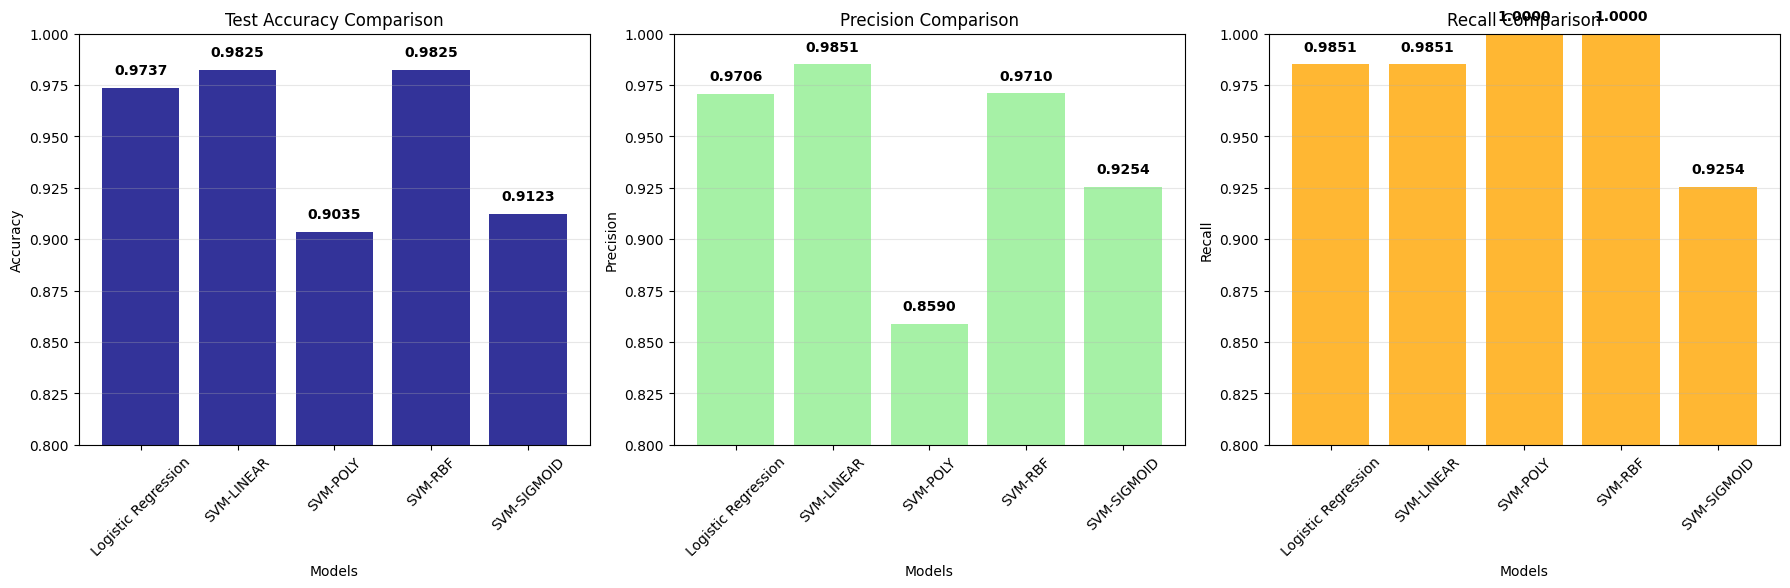

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# We're using the cancer dataset
cancer = load_breast_cancer(as_frame=True)
df_cancer = cancer.frame

# I've separated input features and target
X_in = df_cancer.drop('target', axis=1)
y_out = df_cancer['target']

# I've splited the data
X_train, X_test, y_train, y_test = train_test_split(X_in, y_out, test_size=0.2, random_state=0)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# I've used different kernels to check the model performance.
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svm_metrics = {}

for kernel in kernels:
    if kernel == 'poly':
        svm = SVC(kernel=kernel, C=1, degree=3, random_state=0)
    else:
        svm = SVC(kernel=kernel, C=1, random_state=0)

    svm.fit(X_train_scaled, y_train)

    # Predictions
    y_pred_train_svm = svm.predict(X_train_scaled)
    y_pred_test_svm = svm.predict(X_test_scaled)

    # Evaluation metrics (SVM)
    svm_metrics[kernel] = {
        'train_accuracy': accuracy_score(y_train, y_pred_train_svm),
        'test_accuracy': accuracy_score(y_test, y_pred_test_svm),
        'precision': precision_score(y_test, y_pred_test_svm),
        'recall': recall_score(y_test, y_pred_test_svm),
        'f1': f1_score(y_test, y_pred_test_svm)
    }

# Our task is to compare the performance of SVM with different kernels with logistic regression (HW-3). So I've added the logistic regression model with same properties as HW3 to make a comparison.
regularization_strength = 10
logreg = LogisticRegression(random_state=0, max_iter=1200, penalty='l1', C=1/regularization_strength, solver='liblinear')
logreg.fit(X_train_scaled, y_train)

# Predictions
y_pred_train_lr = logreg.predict(X_train_scaled)
y_pred_test_lr = logreg.predict(X_test_scaled)

# Evaluation metrics (Logistic Regression)
lr_metrics = {
    'train_accuracy': accuracy_score(y_train, y_pred_train_lr),
    'test_accuracy': accuracy_score(y_test, y_pred_test_lr),
    'precision': precision_score(y_test, y_pred_test_lr),
    'recall': recall_score(y_test, y_pred_test_lr),
    'f1': f1_score(y_test, y_pred_test_lr)
}

#Comparison Results
print("SVM with different Kernels vs Logistic Regression")
#SVM
for kernel in kernels:
    print(f"\nSVM - {kernel.upper()} KERNEL:")
    print(f"Train Accuracy: {svm_metrics[kernel]['train_accuracy']:.4f}")
    print(f"Test Accuracy:  {svm_metrics[kernel]['test_accuracy']:.4f}")
    print(f"Precision:      {svm_metrics[kernel]['precision']:.4f}")
    print(f"Recall:         {svm_metrics[kernel]['recall']:.4f}")
    print(f"F1 Score:       {svm_metrics[kernel]['f1']:.4f}")
#Logistic Regression
print("\nLogistic Regression:")
print(f"Train Accuracy: {lr_metrics['train_accuracy']:.4f}")
print(f"Test Accuracy:  {lr_metrics['test_accuracy']:.4f}")
print(f"Precision:      {lr_metrics['precision']:.4f}")
print(f"Recall:         {lr_metrics['recall']:.4f}")
print(f"F1 Score:       {lr_metrics['f1']:.4f}")

# Simple comparison table
print(f"\n{'Model':<20} {'Test Accuracy':<12} {'Precision':<10} {'Recall':<8} {'F1 Score':<10}")
print("-" * 63)
print(f"{'Logistic Regression':<20} {lr_metrics['test_accuracy']:<12.4f} {lr_metrics['precision']:<10.4f} {lr_metrics['recall']:<8.4f} {lr_metrics['f1']:<10.4f}")
for kernel in kernels:
    print(f"{'SVM-'+kernel.upper():<20} {svm_metrics[kernel]['test_accuracy']:<12.4f} {svm_metrics[kernel]['precision']:<10.4f} {svm_metrics[kernel]['recall']:<8.4f} {svm_metrics[kernel]['f1']:<10.4f}")


models = ['Logistic Regression'] + [f'SVM-{kernel.upper()}' for kernel in kernels]

# Prepare data for plotting
test_accuracies = [lr_metrics['test_accuracy']] + [svm_metrics[kernel]['test_accuracy'] for kernel in kernels]
precisions = [lr_metrics['precision']] + [svm_metrics[kernel]['precision'] for kernel in kernels]
recalls = [lr_metrics['recall']] + [svm_metrics[kernel]['recall'] for kernel in kernels]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Accuracy
bars1 = axes[0].bar(models, test_accuracies, color='Navy', alpha=0.8)
axes[0].set_xlabel('Models')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Test Accuracy Comparison')
axes[0].set_ylim(0.8, 1.0)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')
# I've added values on the bar for convenience
for bar, value in zip(bars1, test_accuracies):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
                f'{value:.4f}', ha='center', va='bottom', fontweight='bold')

# Precision
bars2 = axes[1].bar(models, precisions, color='lightgreen', alpha=0.8)
axes[1].set_xlabel('Models')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision Comparison')
axes[1].set_ylim(0.8, 1.0)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')
# I've added values on the bar for convenience
for bar, value in zip(bars2, precisions):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
                f'{value:.4f}', ha='center', va='bottom', fontweight='bold')

# Recall
bars3 = axes[2].bar(models, recalls, color='orange', alpha=0.8)
axes[2].set_xlabel('Models')
axes[2].set_ylabel('Recall')
axes[2].set_title('Recall Comparison')
axes[2].set_ylim(0.8, 1.0)
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True, alpha=0.3, axis='y')
# I've added values on the bar for convenience
for bar, value in zip(bars3, recalls):
    axes[2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
                f'{value:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

SVM with different Kernels vs Logistic Regression

SVM - LINEAR KERNEL:
Train Accuracy: 0.9736
Test Accuracy:  0.9649
Precision:      0.9437
Recall:         1.0000
F1 Score:       0.9710

SVM - POLY KERNEL:
Train Accuracy: 0.7165
Test Accuracy:  0.6667
Precision:      0.6381
Recall:         1.0000
F1 Score:       0.7791

SVM - RBF KERNEL:
Train Accuracy: 0.6374
Test Accuracy:  0.5877
Precision:      0.5877
Recall:         1.0000
F1 Score:       0.7403

SVM - SIGMOID KERNEL:
Train Accuracy: 0.8901
Test Accuracy:  0.8684
Precision:      0.8171
Recall:         1.0000
F1 Score:       0.8993

Logistic Regression:
Train Accuracy: 0.9758
Test Accuracy:  0.9737
Precision:      0.9706
Recall:         0.9851
F1 Score:       0.9778

Model                Test Accuracy Precision  Recall   F1 Score  
---------------------------------------------------------------
Logistic Regression  0.9737       0.9706     0.9851   0.9778    
SVM-LINEAR           0.9649       0.9437     1.0000   0.9710    
SVM-POLY

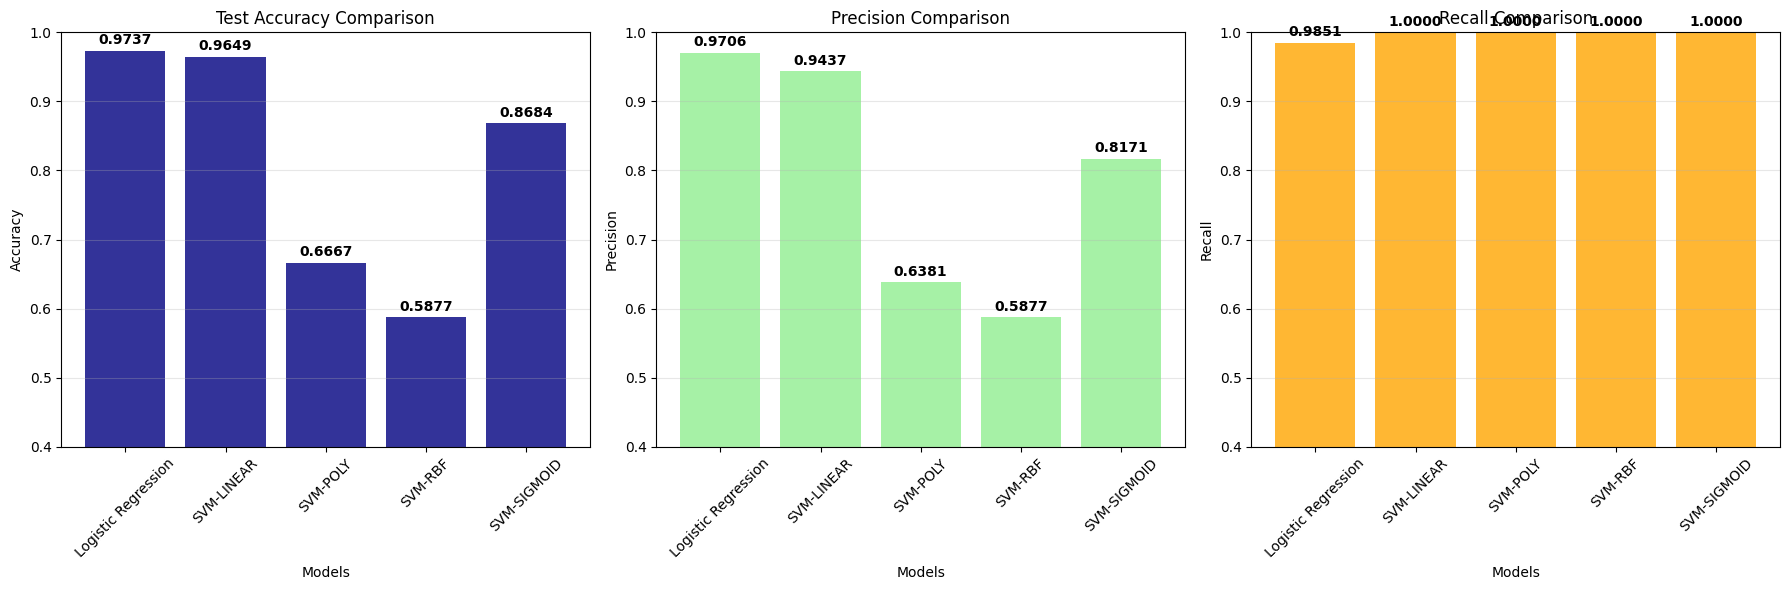

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# We're using the cancer dataset
cancer = load_breast_cancer(as_frame=True)
df_cancer = cancer.frame

# I've separated input features and target
X_in = df_cancer.drop('target', axis=1)
y_out = df_cancer['target']

# I've splited the data
X_train, X_test, y_train, y_test = train_test_split(X_in, y_out, test_size=0.2, random_state=0)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# I've used different kernels to check the model performance.
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svm_metrics = {}

for kernel in kernels:
    if kernel == 'poly':
        svm = SVC(kernel=kernel, C=0.01, degree=3, random_state=0)
    else:
        svm = SVC(kernel=kernel, C=0.01, random_state=0)

    svm.fit(X_train_scaled, y_train)

    # Predictions
    y_pred_train_svm = svm.predict(X_train_scaled)
    y_pred_test_svm = svm.predict(X_test_scaled)

    # Evaluation metrics (SVM)
    svm_metrics[kernel] = {
        'train_accuracy': accuracy_score(y_train, y_pred_train_svm),
        'test_accuracy': accuracy_score(y_test, y_pred_test_svm),
        'precision': precision_score(y_test, y_pred_test_svm),
        'recall': recall_score(y_test, y_pred_test_svm),
        'f1': f1_score(y_test, y_pred_test_svm)
    }

# Our task is to compare the performance of SVM with different kernels with logistic regression (HW-3). So I've added the logistic regression model with same properties as HW3 to make a comparison.
regularization_strength = 10
logreg = LogisticRegression(random_state=0, max_iter=1200, penalty='l1', C=1/regularization_strength, solver='liblinear')
logreg.fit(X_train_scaled, y_train)

# Predictions
y_pred_train_lr = logreg.predict(X_train_scaled)
y_pred_test_lr = logreg.predict(X_test_scaled)

# Evaluation metrics (Logistic Regression)
lr_metrics = {
    'train_accuracy': accuracy_score(y_train, y_pred_train_lr),
    'test_accuracy': accuracy_score(y_test, y_pred_test_lr),
    'precision': precision_score(y_test, y_pred_test_lr),
    'recall': recall_score(y_test, y_pred_test_lr),
    'f1': f1_score(y_test, y_pred_test_lr)
}

#Comparison Results
print("SVM with different Kernels vs Logistic Regression")
#SVM
for kernel in kernels:
    print(f"\nSVM - {kernel.upper()} KERNEL:")
    print(f"Train Accuracy: {svm_metrics[kernel]['train_accuracy']:.4f}")
    print(f"Test Accuracy:  {svm_metrics[kernel]['test_accuracy']:.4f}")
    print(f"Precision:      {svm_metrics[kernel]['precision']:.4f}")
    print(f"Recall:         {svm_metrics[kernel]['recall']:.4f}")
    print(f"F1 Score:       {svm_metrics[kernel]['f1']:.4f}")
#Logistic Regression
print("\nLogistic Regression:")
print(f"Train Accuracy: {lr_metrics['train_accuracy']:.4f}")
print(f"Test Accuracy:  {lr_metrics['test_accuracy']:.4f}")
print(f"Precision:      {lr_metrics['precision']:.4f}")
print(f"Recall:         {lr_metrics['recall']:.4f}")
print(f"F1 Score:       {lr_metrics['f1']:.4f}")

# Simple comparison table
print(f"\n{'Model':<20} {'Test Accuracy':<12} {'Precision':<10} {'Recall':<8} {'F1 Score':<10}")
print("-" * 63)
print(f"{'Logistic Regression':<20} {lr_metrics['test_accuracy']:<12.4f} {lr_metrics['precision']:<10.4f} {lr_metrics['recall']:<8.4f} {lr_metrics['f1']:<10.4f}")
for kernel in kernels:
    print(f"{'SVM-'+kernel.upper():<20} {svm_metrics[kernel]['test_accuracy']:<12.4f} {svm_metrics[kernel]['precision']:<10.4f} {svm_metrics[kernel]['recall']:<8.4f} {svm_metrics[kernel]['f1']:<10.4f}")


models = ['Logistic Regression'] + [f'SVM-{kernel.upper()}' for kernel in kernels]

# Prepare data for plotting
test_accuracies = [lr_metrics['test_accuracy']] + [svm_metrics[kernel]['test_accuracy'] for kernel in kernels]
precisions = [lr_metrics['precision']] + [svm_metrics[kernel]['precision'] for kernel in kernels]
recalls = [lr_metrics['recall']] + [svm_metrics[kernel]['recall'] for kernel in kernels]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Accuracy
bars1 = axes[0].bar(models, test_accuracies, color='Navy', alpha=0.8)
axes[0].set_xlabel('Models')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Test Accuracy Comparison')
axes[0].set_ylim(0.4, 1.0)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')
# I've added values on the bar for convenience
for bar, value in zip(bars1, test_accuracies):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
                f'{value:.4f}', ha='center', va='bottom', fontweight='bold')

# Precision
bars2 = axes[1].bar(models, precisions, color='lightgreen', alpha=0.8)
axes[1].set_xlabel('Models')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision Comparison')
axes[1].set_ylim(0.4, 1.0)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')
# I've added values on the bar for convenience
for bar, value in zip(bars2, precisions):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
                f'{value:.4f}', ha='center', va='bottom', fontweight='bold')

# Recall
bars3 = axes[2].bar(models, recalls, color='orange', alpha=0.8)
axes[2].set_xlabel('Models')
axes[2].set_ylabel('Recall')
axes[2].set_title('Recall Comparison')
axes[2].set_ylim(0.4, 1.0)
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True, alpha=0.3, axis='y')
# I've added values on the bar for convenience
for bar, value in zip(bars3, recalls):
    axes[2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
                f'{value:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()